Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
image_count = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count)

2239


Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=batch_size,
                                                            validation_split = 0.2,
                                                            subset = "training",
                                                            image_size=(img_height,img_width))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
# nevus = list(data_dir_train.glob('nevus/*'))
# PIL.Image.open(str(nevus[0]))
#printing the shape of the dataset using tensorflow steps

# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=batch_size,
                                                            validation_split = 0.2,
                                                            subset = "validation",
                                                            image_size=(img_height,img_width))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### To do, create a code to visualize one instance of all the nine classes present in the dataset

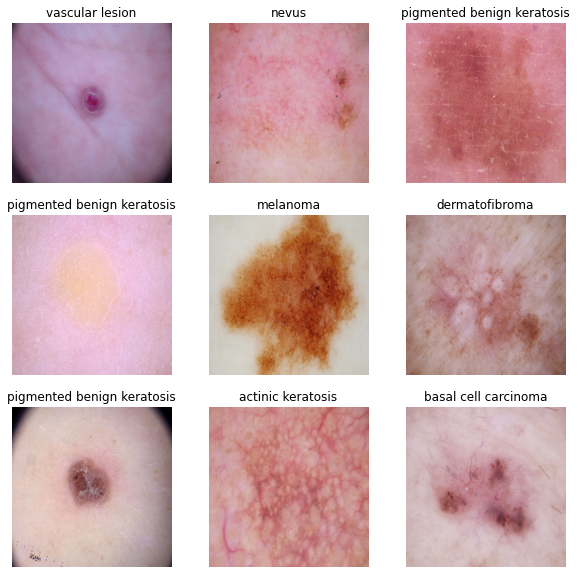

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): #take createsa a Dataset (essentially picks up n number of batches as mentioned in the arguement) with at most count elements from this dataset. In this case it takes the first element from the batch of 32. 
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
### Your code goes here
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model.add(Conv2D(512, (3, 3), padding='same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
 
model.add(layers.Dense(len(class_names),activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 512)     14336     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 512)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 256)       1179904   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 128)      

### Train the model

In [20]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 599s 3s/step - loss: 2.1103 - accuracy: 0.2874 - val_loss: 6.1064 - val_accuracy: 0.1946
Epoch 2/25
56/56 [==============================] - 22s 400ms/step - loss: 1.6555 - accuracy: 0.4258 - val_loss: 2.4371 - val_accuracy: 0.2908
Epoch 3/25
56/56 [==============================] - 22s 392ms/step - loss: 1.5604 - accuracy: 0.4872 - val_loss: 1.8728 - val_accuracy: 0.3468
Epoch 4/25
56/56 [==============================] - 22s 388ms/step - loss: 1.4300 - accuracy: 0.5073 - val_loss: 8.7719 - val_accuracy: 0.1969
Epoch 5/25
56/56 [==============================] - 22s 399ms/step - loss: 1.3865 - accuracy: 0.5067 - val_loss: 1.9230 - val_accuracy: 0.3647
Epoch 6/25
56/56 [==============================] - 22s 391ms/step - loss: 1.3273 - accuracy: 0.5312 - val_loss: 1.8700 - val_accuracy: 0.3378
Epoch 7/25
56/56 [==============================] - 22s 387ms/step - loss: 1.2964 - accuracy: 0.5329 - val_loss: 9.4637 - val_accuracy: 0.2036
E

### Visualizing training results

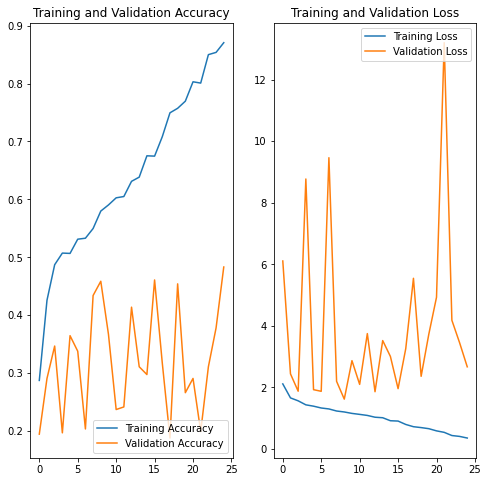

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The model has good fit on training data but poor fit on the test data indicating that the model has overfit the data. 

###### Since the model clearly overfits, we are going to try random data augmentations to improve the accuracy as well as reduce overfitting.

In [48]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
#to augment the data, I am randomly rotating the images and scaling them, so that the model does not overift

model =  tf.keras.Sequential([
              tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)), 
              tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
              tf.keras.layers.experimental.preprocessing.RandomRotation(90),
              #tf.keras.layers.RandomZoom(.5, .2)
             ])

model.add(Conv2D(512, (3, 3), padding='same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(len(class_names),activation='softmax'))


In [51]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

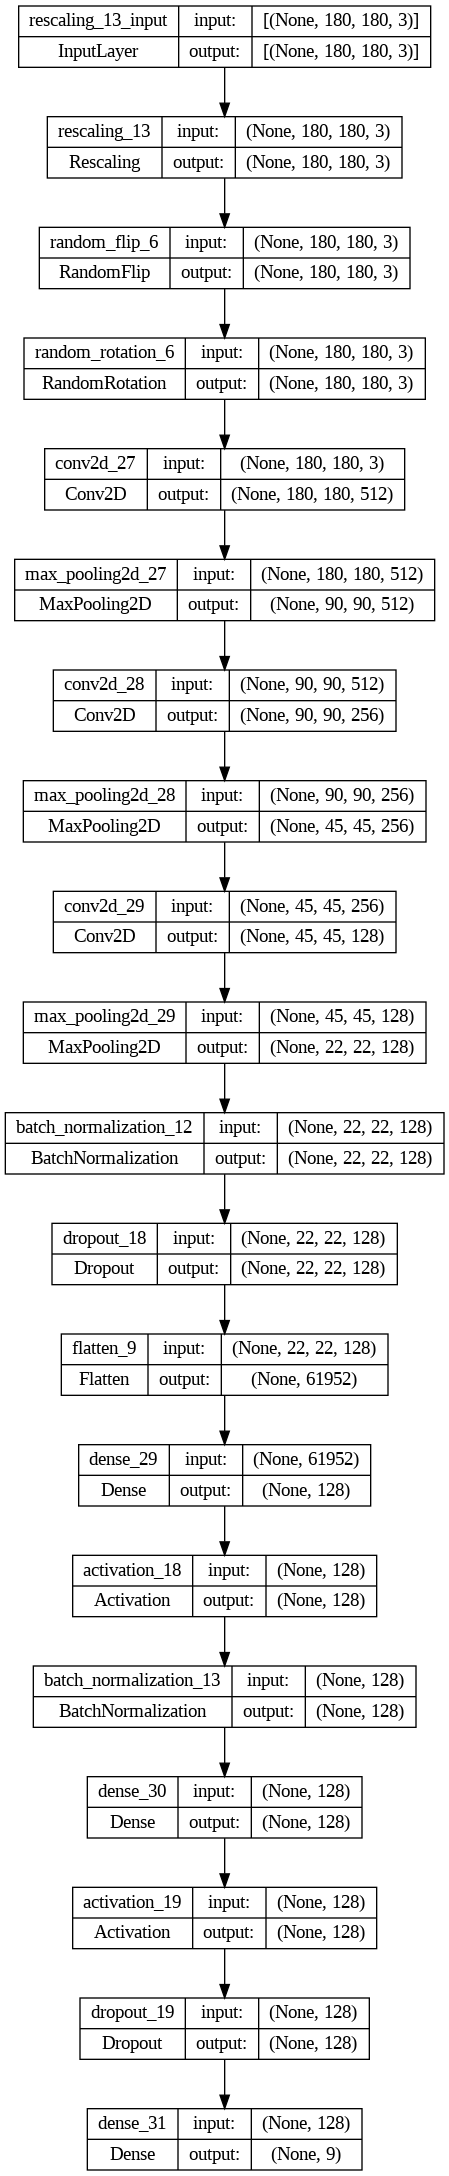

In [52]:
# vizualizing the model 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### To do:
### Create the model, compile and train the model


In [53]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Compiling the model

In [54]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_6 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 512)     14336     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 256)     

### Training the model

In [55]:
## Your code goes here, note: train your model for 20 epochs
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 24s 417ms/step - loss: 2.1179 - accuracy: 0.2863 - val_loss: 2.4697 - val_accuracy: 0.2796
Epoch 2/25
56/56 [==============================] - 23s 411ms/step - loss: 1.7271 - accuracy: 0.3979 - val_loss: 2.6579 - val_accuracy: 0.2975
Epoch 3/25
56/56 [==============================] - 24s 420ms/step - loss: 1.6081 - accuracy: 0.4442 - val_loss: 2.6038 - val_accuracy: 0.2662
Epoch 4/25
56/56 [==============================] - 23s 410ms/step - loss: 1.5917 - accuracy: 0.4554 - val_loss: 3.0788 - val_accuracy: 0.2617
Epoch 5/25
56/56 [==============================] - 23s 411ms/step - loss: 1.5334 - accuracy: 0.4621 - val_loss: 2.2643 - val_accuracy: 0.2662
Epoch 6/25
56/56 [==============================] - 23s 409ms/step - loss: 1.4544 - accuracy: 0.4766 - val_loss: 1.7111 - val_accuracy: 0.4072
Epoch 7/25
56/56 [==============================] - 23s 408ms/step - loss: 1.4331 - accuracy: 0.4933 - val_loss: 7.7479 - val_accuracy: 0.1991

### Visualizing the results

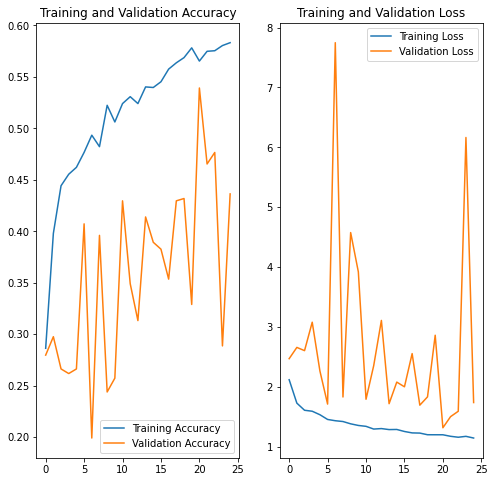

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [57]:
## Your code goes here.
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,melanoma,438
2,dermatofibroma,95
3,pigmented benign keratosis,462
4,nevus,357
5,vascular lesion,139
6,basal cell carcinoma,376
7,seborrheic keratosis,77
8,squamous cell carcinoma,181


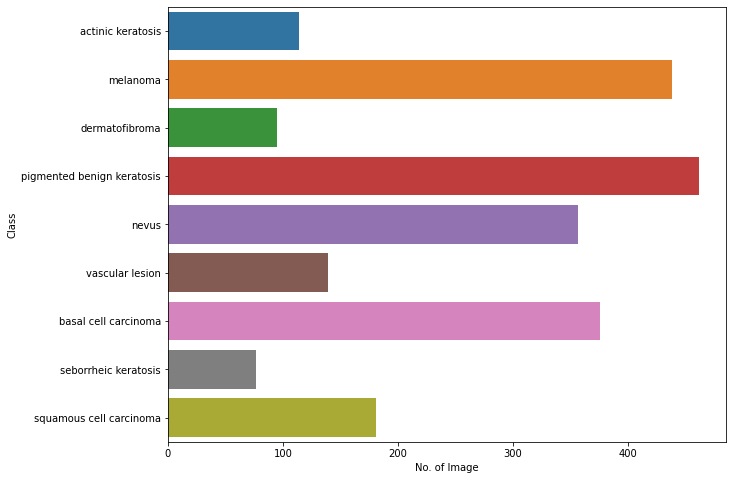

In [58]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented benign keratosis dominates the data.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [59]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [61]:
path_to_training_dataset="/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset + i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2E4D9035E0>: 100%|██████████| 500/500 [00:20<00:00, 24.81 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F30DC737FA0>: 100%|██████████| 500/500 [00:31<00:00, 15.94 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F315AF22070>: 100%|██████████| 500/500 [00:19<00:00, 25.50 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=679x566 at 0x7F3168DCB280>: 100%|██████████| 500/500 [01:28<00:00,  5.68 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=960x645 at 0x7F3168EDD6A0>: 100%|██████████| 500/500 [01:39<00:00,  5.01 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F30DC7A2A00>: 100%|██████████| 500/500 [00:18<00:00, 27.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F30F61C5760>: 100%|██████████| 500/500 [00:42<00:00, 11.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3168EDD6A0>: 100%|██████████| 500/500 [00:17<00:00, 27.91 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F30DC7A2A00>: 100%|██████████| 500/500 [00:17<00:00, 27.86 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [62]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4840


### Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [64]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [65]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [66]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [67]:
df2['Label'].value_counts()

actinic keratosis             840
melanoma                      500
dermatofibroma                500
pigmented benign keratosis    500
nevus                         500
vascular lesion               500
basal cell carcinoma          500
seborrheic keratosis          500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [68]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [69]:
data_dir_train=path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6239 files belonging to 9 classes.
Using 4992 files for training.


#### **Todo:** Create a validation dataset

In [70]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7079 files belonging to 9 classes.
Using 1415 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
# model =  tf.keras.Sequential([
#               tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)), 
#               #tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
#               #tf.keras.layers.experimental.preprocessing.RandomRotation(10),
#               #tf.keras.layers.RandomZoom(.5, .2)
#              ])
# model.add(Conv2D(32, (3, 3), padding='same',
#                  activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same',
#                  activation = 'relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), padding='same',
#                  activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(9))
# model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [71]:
## your code goes here
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_6 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 512)     14336     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 256)     

#### **Todo:**  Train your model

In [73]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
156/156 [==============================] - 153s 968ms/step - loss: 1.3284 - accuracy: 0.4942 - val_loss: 2.6884 - val_accuracy: 0.3406
Epoch 2/30
156/156 [==============================] - 73s 463ms/step - loss: 1.2642 - accuracy: 0.5154 - val_loss: 1.7292 - val_accuracy: 0.4346
Epoch 3/30
156/156 [==============================] - 74s 466ms/step - loss: 1.2479 - accuracy: 0.5180 - val_loss: 11.6748 - val_accuracy: 0.1519
Epoch 4/30
156/156 [==============================] - 73s 461ms/step - loss: 1.2253 - accuracy: 0.5210 - val_loss: 1.4291 - val_accuracy: 0.4940
Epoch 5/30
156/156 [==============================] - 72s 457ms/step - loss: 1.1805 - accuracy: 0.5459 - val_loss: 3.0889 - val_accuracy: 0.3625
Epoch 6/30
156/156 [==============================] - 73s 461ms/step - loss: 1.1550 - accuracy: 0.5497 - val_loss: 1.7127 - val_accuracy: 0.3823
Epoch 7/30
156/156 [==============================] - 73s 460ms/step - loss: 1.1282 - accuracy: 0.5601 - val_loss: 2.2280 - val_

#### **Todo:**  Visualize the model results

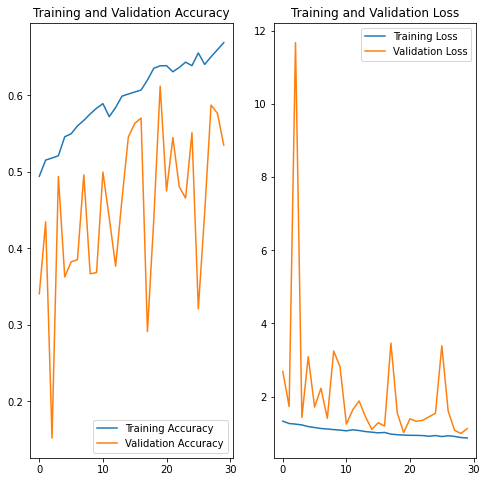

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



##### The overfitting has removed in the dataset. Balancing classes does help in reducing overfitting.

# Testing it on Test Data

In [75]:
#Testing it on the test data
test_ds = tf.keras.utils.image_dataset_from_directory(data_dir_test,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=batch_size,
                                                            image_size=(img_height,img_width))

Found 118 files belonging to 9 classes.


In [76]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/30
156/156 [==============================] - 108s 688ms/step - loss: 0.8620 - accuracy: 0.6735 - val_loss: 2.6548 - val_accuracy: 0.3814
Epoch 2/30
156/156 [==============================] - 69s 437ms/step - loss: 0.8283 - accuracy: 0.6757 - val_loss: 2.9847 - val_accuracy: 0.3898
Epoch 3/30
156/156 [==============================] - 69s 434ms/step - loss: 0.8425 - accuracy: 0.6709 - val_loss: 4.7675 - val_accuracy: 0.2034
Epoch 4/30
156/156 [==============================] - 69s 434ms/step - loss: 0.8352 - accuracy: 0.6729 - val_loss: 2.8279 - val_accuracy: 0.3475
Epoch 5/30
156/156 [==============================] - 69s 437ms/step - loss: 0.8642 - accuracy: 0.6657 - val_loss: 3.0453 - val_accuracy: 0.3220
Epoch 6/30
156/156 [==============================] - 69s 433ms/step - loss: 0.8230 - accuracy: 0.6775 - val_loss: 2.8495 - val_accuracy: 0.3729
Epoch 7/30
156/156 [==============================] - 69s 437ms/step - loss: 0.8317 - accuracy: 0.6825 - val_loss: 3.0527 - val_a